In [1]:
import numpy as np
import matplotlib.pyplot as plt

Constants: (natural units)

In [2]:
H0    = 1.5123e-33
T0    = 0.24e-3
G     = 1
GF    = 1.1664e-23
kB    = 1
Mpl   = 1.2211e28
rho_c = (3*(H0**2))/(8*np.pi*G)

Freeze out temperatures CDM and HDM for intastaneous freeze-out:

In [3]:
def T_fo_HDM(m):
    return pow((GF**2)*Mpl, (-1/3))

def T_fo_HDM_equipart(m):
    return pow(3*kB*(GF**4)*(Mpl**2)/m, (-1/7))

def T_fo_CDM(m):
    return m / np.log(Mpl*(GF**2)*(m**3)*pow(3*kB,(1/2)))

In [4]:
def numdens_fo_HDM(m, T_fo):
    return pow(T_fo, 3)

def numdens_fo_CDM(m, T_fo):
    return pow(m*T_fo, (3/2))*np.exp(-m/T_fo)

Relic abundance today:

In [5]:
## WHERE DOES THIS COME FROM???

def abundance_today(m, sigma, T_fo):
    return (m*(T0**3)) / (rho_c*Mpl*sigma*np.sqrt(3*kB/m)*T_fo**(3/2))

In [6]:
m_min = 100e8
m_max = 100e10
n_points = 100
m = np.logspace(np.log10(m_min), np.log10(m_max), num=n_points) # mass of the DM particle

### Uncomment for HDM

# T_fo = T_fo_HDM(m)

T_fo = T_fo_HDM_equipart(m)
n_fo = numdens_fo_HDM(m, T_fo)


### Uncomment for CDM

# T_fo = T_fo_CDM(m)
# n_fo = numdens_fo_CDM(m, T_fo)

cs_fo = pow(T_fo,2)/(Mpl * n_fo) # cross-section at freeze out

In [7]:
m_min = 100e8
m_max = 100e10
n_points = 100
m = np.logspace(np.log10(m_min), np.log10(m_max), num=n_points) # mass of the DM particle

### Uncomment for HDM

# T_fo = T_fo_HDM(m)

T_fo_hot = T_fo_HDM_equipart(m)
n_fo_hot = numdens_fo_HDM(m, T_fo_hot)


### Uncomment for CDM

T_fo_cold = T_fo_CDM(m)
n_fo_cold = numdens_fo_CDM(m, T_fo_cold)

cs_fo_hot = pow(T_fo_hot,2)/(Mpl * n_fo_hot) # cross-section at freeze out
cs_fo_cold = pow(T_fo_cold,2)/(Mpl * n_fo_cold)

In [8]:
Om_HDM = m*(T0**3)*n_fo_hot/(rho_c*(T_fo_hot**3))
Om_CDM = m*(T0**3)*n_fo_cold/(rho_c*(T_fo_cold**3))

In [9]:
# m = 100e9
# print((GF*m)**2)

# print((GF*T_fo_HDM(m))**2)


In [10]:
# ## I'D SAY YOU CANNOT JUST DEFINE AN ARRAY OF SIGMAs AND USE THAT BECAUSE THE F.O.C. MAY NOT BE SATISFIED THEN!!!

# sigma = np.linspace(10**(-26),10**(-22),1000)
# T_fo = T_fo_CDM(m)
# print(abundance_today(m, (GF*m)**2, T_fo))
# plt.plot(sigma, abundance_today(m, sigma, T_fo))

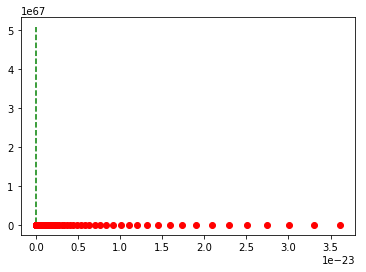

In [17]:
plt.plot(cs_fo_hot, Om_HDM, 'g--', cs_fo_cold, Om_CDM, 'ro')